In [1]:
import requests

# Download YOLOv3 pre-trained weights file
weights_url = "https://pjreddie.com/media/files/yolov3.weights"
weights_path = "yolov3.weights"
response = requests.get(weights_url)
with open(weights_path, "wb") as weights_file:
    weights_file.write(response.content)

# Download YOLOv3 model configuration file
config_url = "https://github.com/pjreddie/darknet/blob/master/cfg/yolov3.cfg?raw=true"
config_path = "yolov3.cfg"
response = requests.get(config_url)
with open(config_path, "wb") as config_file:
    config_file.write(response.content)

# Download COCO class names file
coco_names_url = "https://github.com/pjreddie/darknet/blob/master/data/coco.names?raw=true"
coco_names_path = "coco.names"
response = requests.get(coco_names_url)
with open(coco_names_path, "wb") as coco_names_file:
    coco_names_file.write(response.content)

print("Files downloaded successfully.")


Files downloaded successfully.


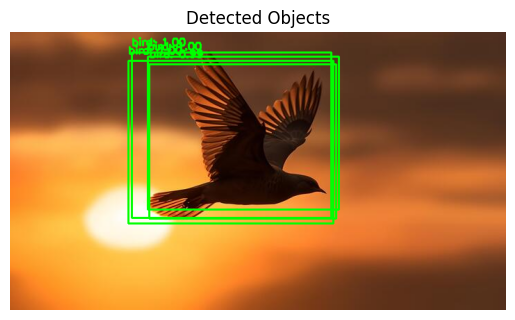

In [4]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Load YOLO (make sure yolov3.weights, yolov3.cfg, and coco.names are in your working directory)
net = cv2.dnn.readNet("yolov3.weights", "yolov3.cfg")

# Load class names
with open("coco.names", "r") as f:
    classes = [line.strip() for line in f.readlines()]

layer_names = net.getLayerNames()
output_layers = [layer_names[i - 1] for i in net.getUnconnectedOutLayers().flatten()]

# Function to process image and detect objects
def detect_objects(image, min_size=0.1):
    height, width, channels = image.shape

    # Detecting objects
    blob = cv2.dnn.blobFromImage(image, scalefactor=0.00392, size=(416, 416), mean=(0, 0, 0), swapRB=True, crop=False)
    net.setInput(blob)
    outs = net.forward(output_layers)

    for out in outs:
        for detection in out:
            scores = detection[5:]
            class_id = np.argmax(scores)
            confidence = scores[class_id]

            if confidence > 0.5:
                # Object detected
                center_x = int(detection[0] * width)
                center_y = int(detection[1] * height)
                w = int(detection[2] * width)
                h = int(detection[3] * height)

                # Filter by minimum size
                if w * h / (width * height) > min_size:
                    # Draw bounding box
                    x = center_x - w // 2
                    y = center_y - h // 2
                    cv2.rectangle(image, (x, y), (x + w, y + h), (0, 255, 0), 2)
                    label = f"{classes[class_id]}: {confidence:.2f}"
                    cv2.putText(image, label, (x, y - 10), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 255, 0), 2)

    return image

# Main function
def main():
    image_path = input("Enter image path: ").strip()
    image = cv2.imread(image_path)

    if image is None:
        print("Failed to load image. Check the path.")
        return

    # Detect objects
    detected_image = detect_objects(image.copy())

    # Convert BGR to RGB for displaying with matplotlib
    rgb_image = cv2.cvtColor(detected_image, cv2.COLOR_BGR2RGB)
    plt.imshow(rgb_image)
    plt.axis('off')
    plt.title("Detected Objects")
    plt.show()

if __name__ == "__main__":
    main()


Detected Objects:
  - Name: bird
    - Bounding Box: (x: 318, y: 148, width: 287, height: 238)
  - Name: bird
    - Bounding Box: (x: 335, y: 145, width: 275, height: 220)
  - Name: bird
    - Bounding Box: (x: 317, y: 158, width: 295, height: 234)
  - Name: bird
    - Bounding Box: (x: 334, y: 157, width: 269, height: 222)


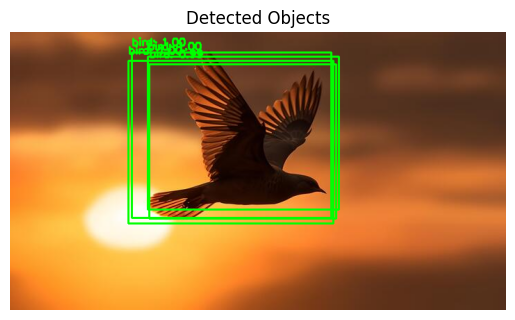

In [6]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Load YOLO (make sure the required files are in your working directory)
net = cv2.dnn.readNet("yolov3.weights", "yolov3.cfg")

# Load class labels
with open("coco.names", "r") as f:
    classes = [line.strip() for line in f.readlines()]

# Get output layer names
layer_names = net.getLayerNames()
output_layers = [layer_names[i - 1] for i in net.getUnconnectedOutLayers().flatten()]

# Function to process image and detect objects
def detect_objects(image, min_size=0.1):
    height, width, channels = image.shape

    # Create blob and perform forward pass
    blob = cv2.dnn.blobFromImage(image, scalefactor=0.00392, size=(416, 416),
                                 mean=(0, 0, 0), swapRB=True, crop=False)
    net.setInput(blob)
    outs = net.forward(output_layers)

    detected_objects = []

    for out in outs:
        for detection in out:
            scores = detection[5:]
            class_id = np.argmax(scores)
            confidence = scores[class_id]

            if confidence > 0.5:
                # Object detected
                center_x = int(detection[0] * width)
                center_y = int(detection[1] * height)
                w = int(detection[2] * width)
                h = int(detection[3] * height)

                # Filter by minimum size
                if w * h / (width * height) > min_size:
                    object_name = classes[class_id]
                    detected_objects.append((object_name, (center_x, center_y, w, h)))

                    # Draw bounding box
                    x = center_x - w // 2
                    y = center_y - h // 2
                    cv2.rectangle(image, (x, y), (x + w, y + h), (0, 255, 0), 2)
                    label = f"{object_name}: {confidence:.2f}"
                    cv2.putText(image, label, (x, y - 10), cv2.FONT_HERSHEY_SIMPLEX,
                                0.5, (0, 255, 0), 2)

    return detected_objects, image

# Main function
def main():
    image_path = input("Enter image path: ").strip()
    image = cv2.imread(image_path)

    if image is None:
        print("Could not load image. Please check the file path.")
        return

    # Detect objects
    detected_objects, image_with_boxes = detect_objects(image.copy())

    # Print detected objects
    if detected_objects:
        print("Detected Objects:")
        for obj_name, (x, y, w, h) in detected_objects:
            print(f"  - Name: {obj_name}")
            print(f"    - Bounding Box: (x: {x}, y: {y}, width: {w}, height: {h})")
    else:
        print("No objects detected in the image.")

    # Convert BGR to RGB for displaying correctly with matplotlib
    rgb_image = cv2.cvtColor(image_with_boxes, cv2.COLOR_BGR2RGB)
    plt.imshow(rgb_image)
    plt.axis('off')
    plt.title("Detected Objects")
    plt.show()

if __name__ == "__main__":
    main()



 * Serving Flask app '__main__'
 * Debug mode: on


 * Running on all addresses (0.0.0.0)
 * Running on http://127.0.0.1:5000
 * Running on http://192.168.3.191:5000
Press CTRL+C to quit
 * Restarting with watchdog (windowsapi)


SystemExit: 1